In [26]:
# Data 
import pandas as pd
import matplotlib.pyplot as plt
features = pd.read_csv('train_values.csv')
target = pd.read_csv('train_labels.csv')
features.head()
#features.info()



,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


The first column is the id of the buiding, the 2nd, 3rd and 4th columns are IDs for some geographical charactirisrtics and are used to link the above date table with another one presenting some geographical information, as we don't have the full picture of the data, we can consider those columns as catogorical data and note numerical (as it seems).

Some of the remaining features are clearly interpretable, but many of them are hard to know what they reflect even wih a further internet research.

To conduct the analysis we are going to isolate the categorical independent variables  from the numerical ones.


ADA added as label for the moment

In [2]:
features.shape
# Test another time

(260601, 39)

In [47]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [46]:
columns_names = features.columns
categorical = list(columns_names[8:15])
categorical.append(columns_names[26])
numerical = [name for name in columns_names if name not in categorical]
len(numerical)

31

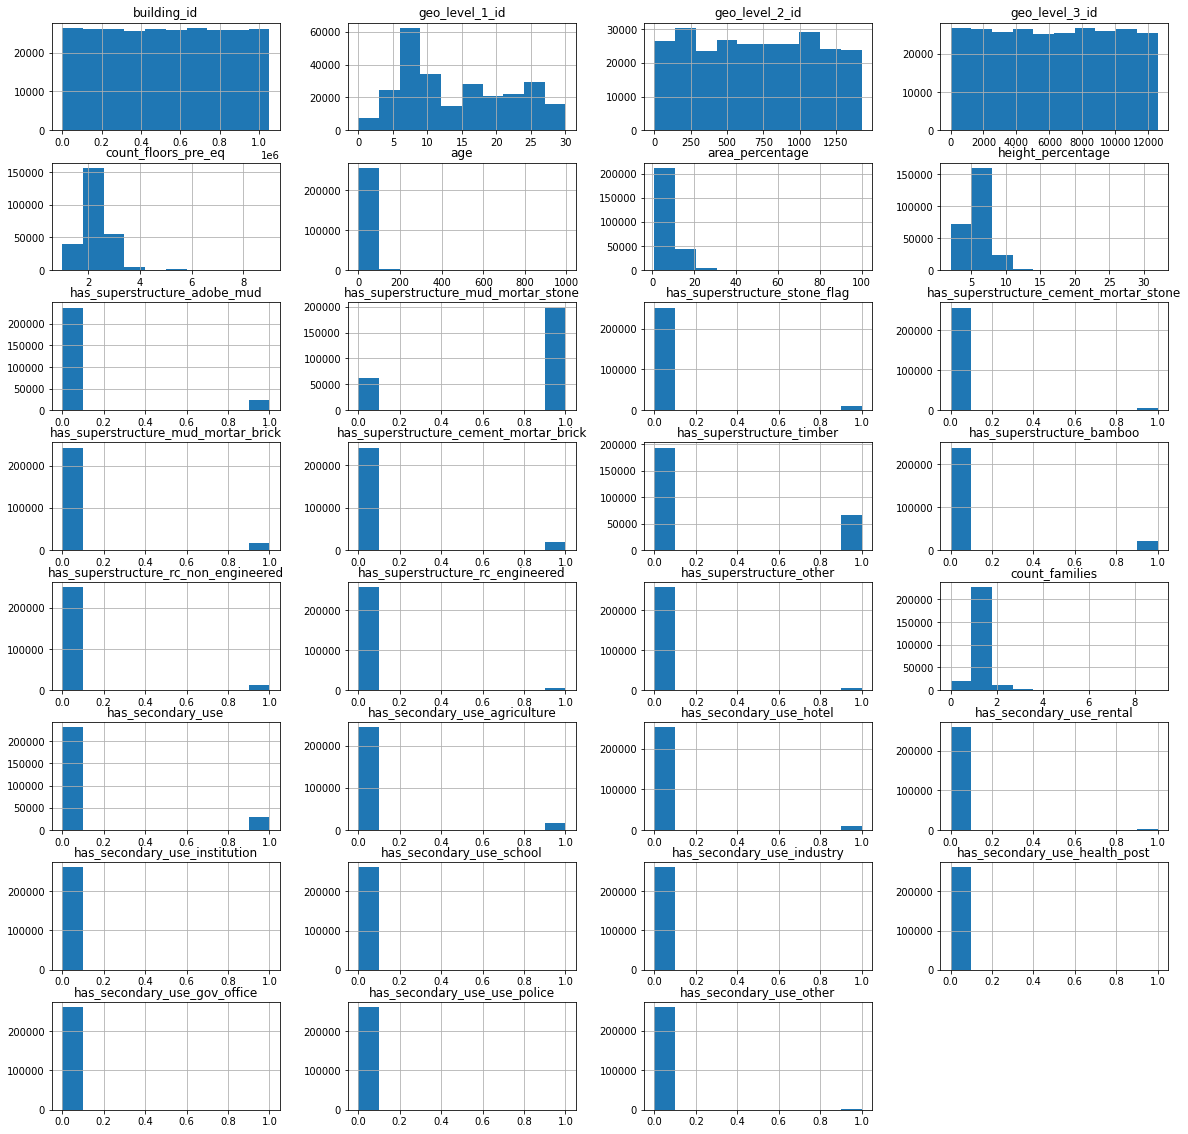

In [8]:
features[numerical].hist(bins = 10,figsize = (20,20),layout = (8,4))
plt.title('Distribution for each of the numerical variables')
plt.savefig('numerical_variables.png')

as we mentioned earlier,the four first columns are IDs to connect this table with others to conduct further analysis, but we suggest to drop out those variables for two reasons:

1- We don't have the other tables with the same Id as a primary key.
2- As the plot above shows, the IDs are uniformally distributed, so we can't find some commun charactiristics for a given ID, for example if there was so many buildinds with the same geographical_level_ID we could make some hypothesis, but in our case we can't.

A second remarque is regarding the last 7 columns (has_secondary_use_rental,..., has_secondary_use_use_police), those are binary variables (maybe it is the result of a one-hot encoding of a variable like (secondary_use)), but what is important to us is they are almost negative ( they don't have a secondary use), so they will not help in tuning the model nor in the analysis (all data points have the same value, so the gradient according to those variables will be always zero). for this reason we suggest dropping them form the analysis.

In [47]:
relevent_numerical = numerical[4:24]
relevent_numerical.append(numerical[-1])
len(relevent_numerical)

21

Let's conduct the same analysis but for the categorical data this time

In [48]:
nume = features[categorical]
nume.head()


,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
0,t,r,n,f,q,t,d,v
1,o,r,n,x,q,s,d,v
2,t,r,n,f,x,t,d,v
3,t,r,n,f,x,s,d,v
4,t,r,n,f,x,s,d,v


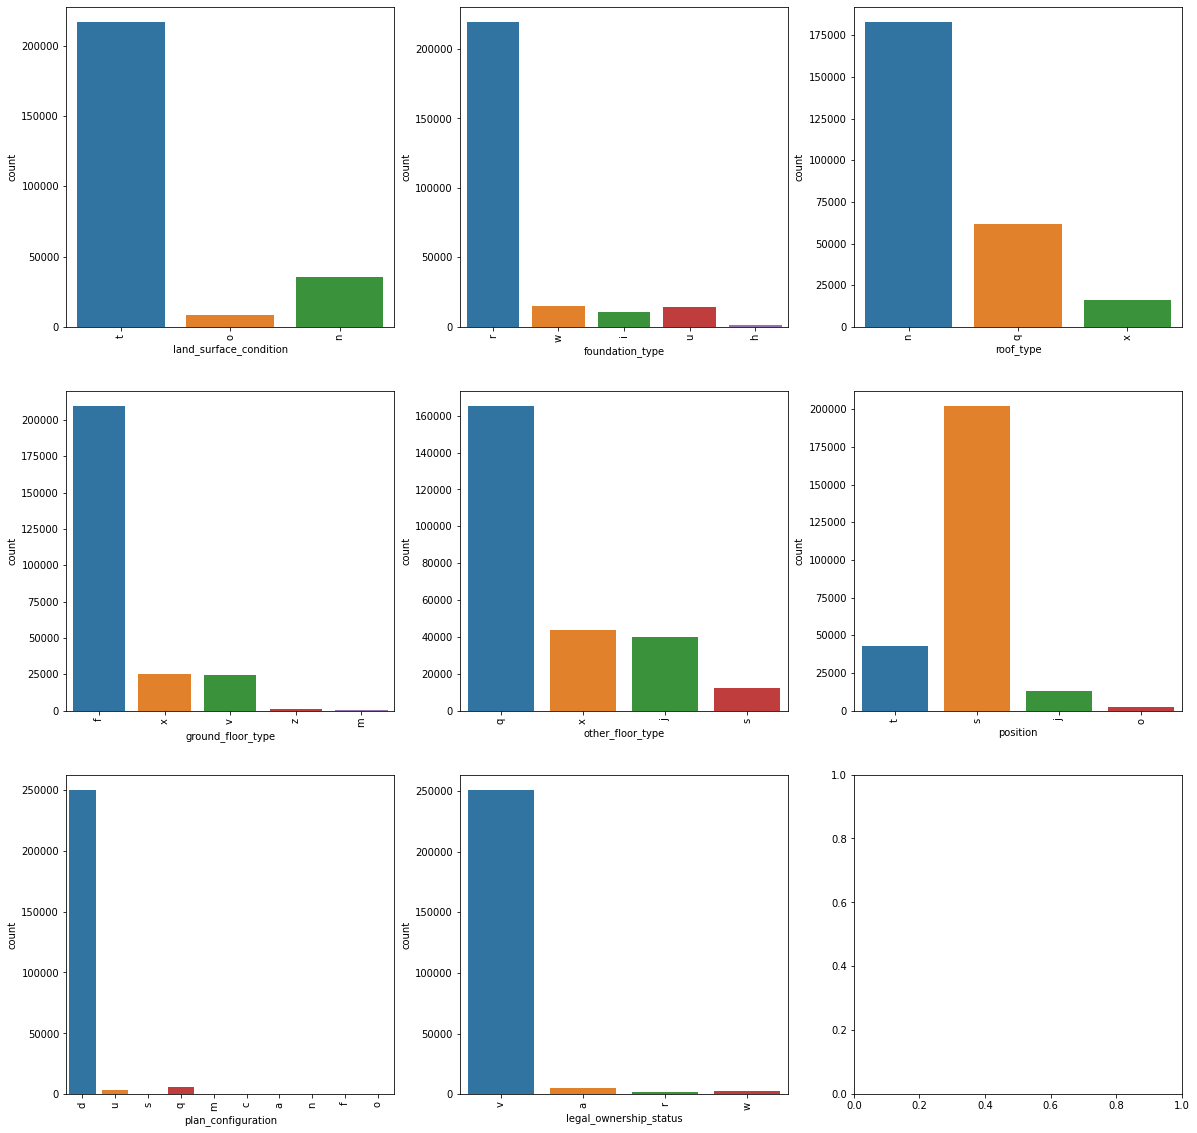

In [49]:
import seaborn as sns
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(features[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

We can clearly see that the majority of the buildings have 't' land surface condition, a 'd' plan configuration, a 'v' legal ownership status and so on. 
One thing we can do is regarding the plan configuration; as we are aiming to conduct a one hot encoding for this categorical data il will be wise to consider only the 'd','u', and 'q' configurations as the others are abscent for this data set (in real world we shouldn't make such a decision because we can't expect all the configurations we will deal with in the future).


In [51]:
new_features = features[relevent_numerical + categorical]
new_features.shape

(260601, 29)

In [ ]:
# The 

In [3]:
target.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [34]:
#target['damage_grade'].plot(kind = 'bar')
counts_target = target['damage_grade'].value_counts()
counts_foundation_type = features['foundation_type'].value_counts()
counts_foundation_type

r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64

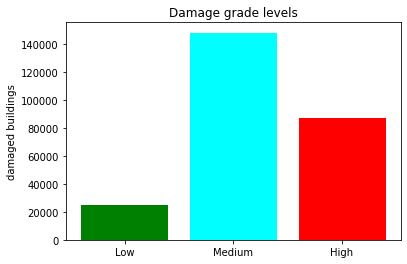

In [22]:
plt.bar([2,3,1],list(counts),color=['cyan', 'red', 'green'])
plt.xticks([2,3,1], ['Medium','High','Low'])
plt.ylabel('damaged buildings')
plt.title('Damage grade levels')
plt.savefig('repartition.png')


In [5]:
import random
# let's use only 10% of the available data to do the analysis
# so the number of the data points would be 2600 instead of 26 000
# we choose this sample randomly from the data.

indeces = random.sample(range(26000),2600)

sample_features = features.iloc[indeces]
sample_target = target.iloc[indeces]

sample_features.shape

(2600, 39)

Before we start modeling the phenomenen it sounds crucial to check out the data first !
At first there exist 39 features to describe the damage level for a building, this information is provided for more than 26 000 building wich makes it an important amount of data.

#------------ The problem -------------------------------------------------------
Given some  construction and location charactiristics of a building, what is the level of damage that may cause an earthquake ?

#------------ Business interest -------------------------------------------------
Answering a question as the one above may serve many interests for example, it may help the insurance companies to tune the best formula to cover a natural disater for thier client, or to help local othoroties to deside whether to build a given structure in a location or not, we can also use the model to find the best charactiristics for a building in a given location.

#------------ What is a damage level ? --------------------------------------------
Using the column 'damage_grade' of the target data we can see that there exist three grades (1,2 and 3), they can also be described as low, medium and high level damage, 'réparti' as follow:

The first thing we can see is that the data is not balanced, which means we need to be more precausious while deciding the performance metric, and taking this imbalce into account while tuning the model.

#----------------Checking for missing values ----------------------------------------





In [23]:
features.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [24]:
target.isnull().sum()

building_id     0
damage_grade    0
dtype: int64

Fortunatlly there is no missing values in our data (at least those which pandas can detect)

Is there any Outliers ?


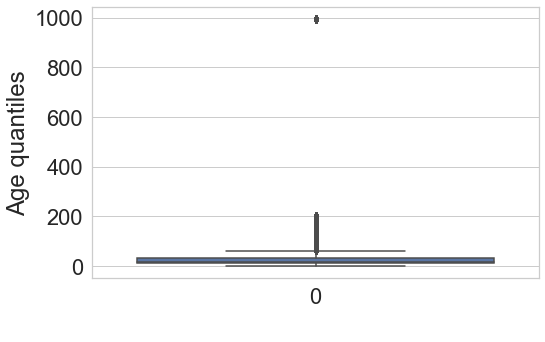

In [46]:
import seaborn as sns
sns.set(style='whitegrid', palette="deep", font_scale=2, rc={"figure.figsize": [8, 5]})
sns.boxplot(data = features['age']).set(xlabel=' ', ylabel='Age quantiles')
plt.savefig('ageoutlier.png')

for the age feature we see that there is a building with an age of about 1000 years, which seems unrealistic, but what matters for us is that such an a outlier may ruin our analysis and predcition so it's may be wise removing it.

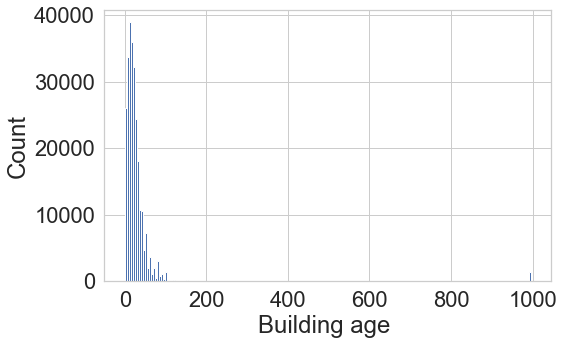

In [44]:
sns.set(style='whitegrid', palette="deep", font_scale=2, rc={"figure.figsize": [8, 5]})
sns.distplot(
    features['age'], norm_hist=False, kde=False, bins=200, hist_kws={"alpha": 1}
).set(xlabel='Building age ', ylabel='Count')
plt.savefig('agedistribution.png')